<a href="https://colab.research.google.com/github/GuillermoCalderon23/ProgramacionAD/blob/main/Taller_2docorte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Taller de Minería de Texto — Análisis de "El cuervo" - Edgar Allan Poe***

Objetivo. El estudiante aprende sobre técnicas de preprocesamiento y visualización en la minería de texto.


---



# ✅ **Paso 1: Entender el contexto del poema.**

“El Cuervo” es un poema narrativo de Edgar Allan Poe, famoso por su atmósfera oscura y temática melancólica. A lo largo del poema, el hablante explora la pérdida, el dolor y la obsesión.

La historia trata de un hombre que está muy triste porque su amada, Leonora, ha muerto.

Una noche, mientras lee en su habitación, escucha unos golpes. Cuando abre la puerta, no hay nadie. Luego, un cuervo entra volando y se posa sobre una estatua. El hombre empieza a hablarle, y el cuervo solo responde con una palabra: "Nunca más".

Esa respuesta repetida hace que el hombre se desespere. Cree que el cuervo le está diciendo que nunca volverá a ver a Leonora y que su dolor durará para siempre.

El poema habla del dolor por la pérdida, de cómo a veces no podemos dejar atrás a quienes hemos amado, y de cómo eso puede llevarnos a la tristeza profunda o incluso a la locura. El cuervo representa la muerte y la idea de que hay cosas que no podemos cambiar ni olvidar.


---



# ✅ **Paso 2: Instalar las librerías necesarias en colab.**

In [16]:
# Librerías para scraping y procesamiento

!pip install selenium
!pip install beautifulsoup4 # librería para parsear HTML o XML. Nos permite buscar, filtrar y extraer información de etiquetas como <div>, <p>, etc.
!pip install nltk #NLTK (Natural Language Toolkit), una de las librerías más usadas para procesamiento de lenguaje natural. La usaremos para: Tokenizar,Quitar stopwords y Generar bigramas.
!pip install spacy # librería moderna, rápida y precisa para NLP. La usaremos para lematización, que es el proceso de reducir palabras a su forma base.
!pip install wordcloud
!pip install matplotlib
!pip install seaborn


# Modelo de idioma inglés para spaCy (esencial para lematización)
!python -m spacy download es_core_news_sm #  Descarga el modelo de idioma inglés para spaCy: en_core_web_sm. Incluye: Vocabulario, Reglas gramaticales, Modelo estadístico para lemas, etiquetas gramaticales, etc.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 63.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.




---



# ✅ **Web Scraping - poema "El Cuervo" - versión Ingles**




In [39]:
import sys
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup

# 🧭 Configuramos Chrome para que funcione sin interfaz gráfica (headless)
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--no-sandbox")

# 🚀 Lanzamos navegador y accedemos a la página del poema
driver = webdriver.Chrome(options=chrome_options)
url = "https://www.poetryfoundation.org/poems/48860/the-raven"
driver.get(url)

# 🕸️ Extraemos el HTML y analizamos con BeautifulSoup
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# 🔍 Buscamos el div que contiene el poema
poem_div = soup.find('div', class_='poem-body overflow-x-auto')
poem_text = poem_div.get_text(separator=' ', strip=True) if poem_div else ""

# ✅ Cerramos el navegador
driver.quit()

# 👀 Vista previa del texto
print(poem_text[:500])


Once upon a midnight dreary, while I pondered, weak and weary, Over many a quaint and curious volume of forgotten lore— While I nodded, nearly napping, suddenly there came a tapping, As of some one gently rapping, rapping at my chamber door. “’Tis some visitor,” I muttered, “tapping at my chamber door— Only this and nothing more.” Ah, distinctly I remember it was in the bleak December; And each separate dying ember wrought its ghost upon the floor. Eagerly I wished the morrow;—vainly I had sough




---



# ✅ **Paso 4: Utilizar técnicas de preprocesamiento**.

## **a. Tokenización**
Es el proceso de dividir el texto en unidades individuales, normalmente palabras o signos de puntuación.

In [40]:
import spacy

# Cargamos el modelo de lenguaje en inglés
nlp = spacy.load("en_core_web_sm")

# Procesamos el texto del poema
doc = nlp(poem_text)

# Extraemos los tokens como texto
tokens = [token.text for token in doc]
print("🔹 Tokens:", tokens[:15])


🔹 Tokens: ['Once', 'upon', 'a', 'midnight', 'dreary', ',', 'while', 'I', 'pondered', ',', 'weak', 'and', 'weary', ',', 'Over']


## **b. Conversión a minúsculas**

In [41]:
# Convertimos cada palabra a minúscula
tokens_lower = [token.lower() for token in tokens]
print("🔹 Minúsculas:", tokens_lower[:15])


🔹 Minúsculas: ['once', 'upon', 'a', 'midnight', 'dreary', ',', 'while', 'i', 'pondered', ',', 'weak', 'and', 'weary', ',', 'over']


## **c. Eliminación de palabras clave (stopwords)**
Eliminar palabras sin valor semántico como “the”, “and”, “is”.

In [42]:
import nltk
from nltk.corpus import stopwords

# Descargamos las stopwords en inglés
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Quitamos signos de puntuación y stopwords
tokens_clean = [word for word in tokens_lower if word.isalpha() and word not in stop_words]
print("🔹 Tokens limpios:", tokens_clean[:15])


🔹 Tokens limpios: ['upon', 'midnight', 'dreary', 'pondered', 'weak', 'weary', 'many', 'quaint', 'curious', 'volume', 'forgotten', 'lore', 'nodded', 'nearly', 'napping']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **d. Lematización**
Convertir palabras a su forma base (run, child, etc).

In [43]:
import pandas as pd

# Extraemos palabra original y su lema
tokens_info = [
    (token.text, token.lemma_)
    for token in doc
    if token.is_alpha and token.text.lower() not in stop_words
]



---



# **✅ Paso 5: Crear un DataFrame con las palabras resultantes**

In [44]:
# Crear DataFrame
df = pd.DataFrame(tokens_info, columns=["palabra_original", "lema"])

# Agregar columnas adicionales
df["longitud"] = df["palabra_original"].apply(len)
df["frecuencia"] = df["lema"].map(df["lema"].value_counts())

df.head()



,palabra_original,lema,longitud,frecuencia
0,upon,upon,4,5
1,midnight,midnight,8,1
2,dreary,dreary,6,1
3,pondered,ponder,8,1
4,weak,weak,4,1


# **Paso adicional: Agregar variable para Traducir al español**

In [58]:
!pip install deep-translator

from deep_translator import GoogleTranslator

# Traducimos los lemas únicos
lemas_unicos = df["lema"].dropna().unique()
traducciones = {}

for lema in lemas_unicos:
    try:
        traducciones[lema] = GoogleTranslator(source='en', target='es').translate(lema)
    except Exception as e:
        print(f"Error traduciendo '{lema}': {e}")
        traducciones[lema] = lema  # Si falla, dejamos el original

# Agregamos al DataFrame
df["lema_ESP"] = df["lema"].map(traducciones)
df = df[["palabra_original", "lema", "lema_ESP", "longitud", "frecuencia"]]
df.head()


,palabra_original,lema,lema_ESP,longitud,frecuencia
0,upon,upon,al,4,5
1,midnight,midnight,medianoche,8,1
2,dreary,dreary,triste,6,1
3,pondered,ponder,reflexionar,8,1
4,weak,weak,débil,4,1


# **✅ Paso 6: Creación las siguientes visualizaciones**

### **a. Gráfico de frecuencia**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


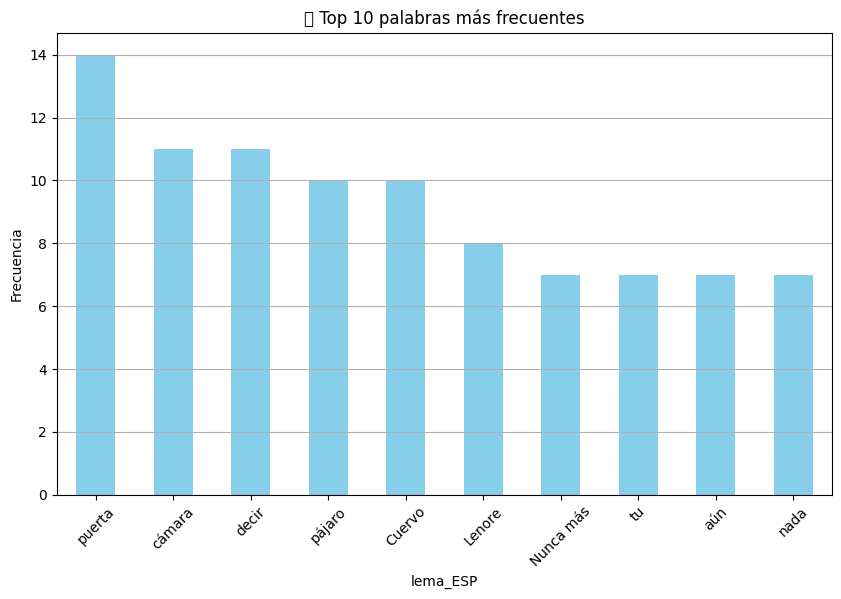

In [59]:
import matplotlib.pyplot as plt

top_words = df["lema_ESP"].value_counts().head(10)

plt.figure(figsize=(10,6))
top_words.plot(kind='bar', color='skyblue')
plt.title("🔝 Top 10 palabras más frecuentes")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()


### **b. Nube de palabras**

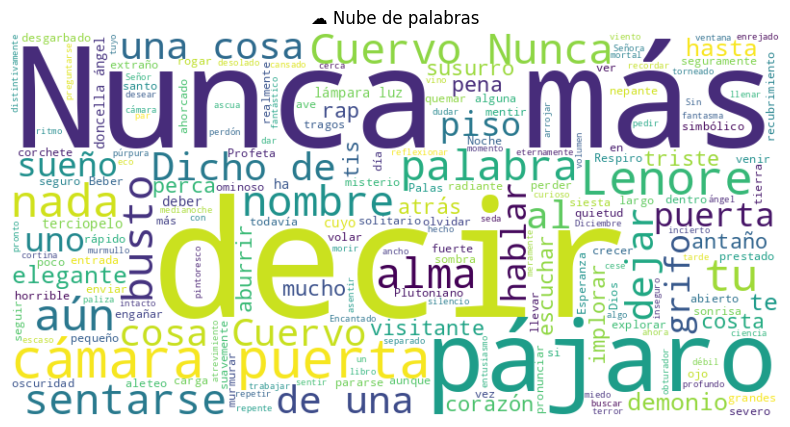

In [60]:
from wordcloud import WordCloud

text_for_cloud = " ".join(df["lema_ESP"])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_cloud)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("☁️ Nube de palabras")
plt.show()


### c. Gráfico de dispersión (longitud vs lema)

<ipython-input-62-ba735ebcf62e>:17: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


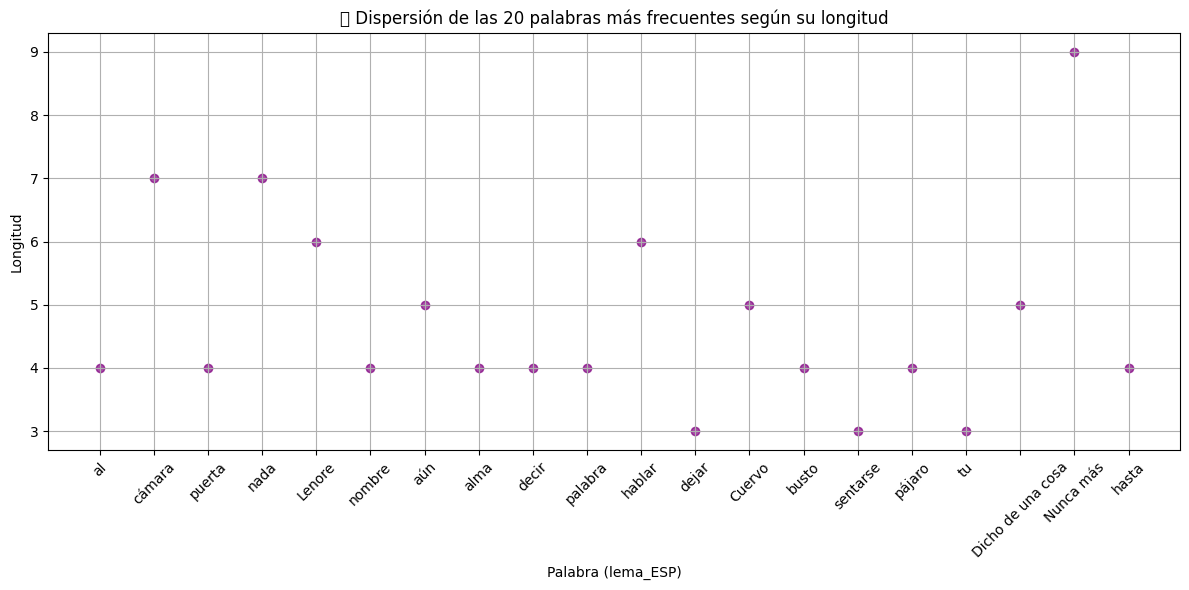

In [62]:
import matplotlib.pyplot as plt

# Paso 1: Filtrar las 20 palabras más frecuentes (por su lema en español)
top20 = df["lema_ESP"].value_counts().head(20).index
df_top20 = df[df["lema_ESP"].isin(top20)].drop_duplicates("lema_ESP")

# Paso 2: Gráfico de dispersión
plt.figure(figsize=(12,6))
plt.scatter(df_top20["lema_ESP"], df_top20["longitud"], color='purple', alpha=0.7)

# Estética del gráfico
plt.title("📍 Dispersión de las 20 palabras más frecuentes según su longitud")
plt.xlabel("Palabra (lema_ESP)")
plt.ylabel("Longitud")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# **✅ Paso 7: Conclusión**
Este taller nos permitió aplicar técnicas de minería de texto sobre un poema clásico y complejo. A través del preprocesamiento, logramos estructurar el texto de "El Cuervo"en un mejor formato. Al ver la frecuencia de palabras, se hizo evidente la intensidad emocional de la obra como lo hablabamos en el paso1. Palabras como “puerta”, “cuervo”, “decir”, “nunca más”, "nada", "alma", "Lenore" se repiten, reflejando un ambiente de angustia o un lado oscuro o del mas alla.

La traducción no permitió aprovechar mejor las herramientas de acuerdo a su lenguaje de creacion y al traducir mejoramos la interpretación de la visualización.

Este proceso no solo facilitó un análisis textual, sino que también reafirma el valor del procesamiento de lenguaje natural para extraer patrones y significado en textos. Muchas gracias Profe.